<font size="5">Association Rule Mining</font>

Dataset - groceries.csv

In [1]:
#1 Apply association rule mining on the groceries dataset 
#Use min_sup = 0.003, min_conf = 0.3, min_lift = 2 and min_length = 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
    
dataset = pd.read_csv('groceries.csv', header = None)


grocery=[]
for i in range(0, 9836):
    grocery.append([str(dataset.values[i,j]) for j in range(0, 32)])

from apyori import apriori
rules = apriori(grocery, min_support = 0.003, min_confidence = 0.3, min_lift = 2, min_length = 2)
results = list(rules)
print(results)

[RelationRecord(items=frozenset({'Instant food products', 'hamburger meat'}), support=0.0030500203334688897, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'hamburger meat'}), confidence=0.37974683544303794, lift=11.422599001277435)]), RelationRecord(items=frozenset({'other vegetables', 'baking powder'}), support=0.0073200488003253355, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'other vegetables'}), confidence=0.41379310344827586, lift=2.138764564118361)]), RelationRecord(items=frozenset({'whole milk', 'baking powder'}), support=0.009251728344855633, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'whole milk'}), confidence=0.5229885057471264, lift=2.047001568853456)]), RelationRecord(items=frozenset({'root vegetables', 'beef'}), support=0.01738511590077267, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef

#2 Convert this cell into Markdown cell and write down the top 5 rules 
#with support, confidence and lift using previous configuration

np.array(results).head(5)




In [3]:
#3 Play with min_sup to find the rule with maximum support value (Keeping other configurations same)

from apyori import apriori
rules2 = apriori(grocery, min_support = 0.048, min_confidence = 0.3, min_lift = 2, min_length = 2)
results2 = list(rules2)
print(results2)


[]


In [4]:
#4 Play with min_conf to find the rule with maximum confidence value (Keeping other configurations same)

rules3=apriori(grocery,min_support=0.003,min_confidence=1.00001,min_left=2,min_length=2)
results3=list(rules3)
print(results3)



[]


In [10]:
#5 Play with min_lift to find the rule with maximum lift value (Keeping other configurations same)

rules4=apriori(grocery,min_support=0.003,min_confidence=0.3,min_left=0.1,min_length=2)
results4=list(rules4)
print(results4)



[RelationRecord(items=frozenset({'nan'}), support=0.9997966653111021, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.9997966653111021, lift=1.0)]), RelationRecord(items=frozenset({'hamburger meat', 'Instant food products'}), support=0.0030500203334688897, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'hamburger meat'}), confidence=0.37974683544303794, lift=11.422599001277435)]), RelationRecord(items=frozenset({'Instant food products', 'nan'}), support=0.008031720211468077, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'nan'}), confidence=1.0, lift=1.0002033760423021)]), RelationRecord(items=frozenset({'Instant food products', 'whole milk'}), support=0.0030500203334688897, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'whole milk'}), confidence=0.3797

<font size="5">Simple Linear Regression</font>

In this example you will consider sales based on 'TV' marketing budget.

You will build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.

Dataset - tvmarketing.csv

In [57]:
#6 Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [58]:
#7 Import dataset and display first 5 rows
dataset=pd.read_csv('tvmarketing.csv')
dataset.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [59]:
#8 Display last 5 rows
dataset.tail(5)


,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [60]:
#9 Check column data types

dataset.dtypes

TV       float64
Sales    float64
dtype: object

In [61]:
#10 Check the shape of the DataFrame (rows, columns)

dataset.shape

(200, 2)

In [62]:
#11 Look at summary statistics

dataset.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


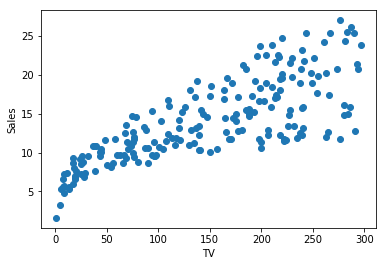

In [63]:
#12 Visualise the relationship between the features and the dependent variable using scatterplots

plt.scatter(dataset['TV'],dataset['Sales'])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [64]:
#13 Prepare  X (feature variables) and y (response variable)
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,1:].values
print(X,Y)


[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [65]:
#14 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [66]:
#15 Print the shape of train data and test data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(140, 1)
(140, 1)
(60, 1)
(60, 1)


In [ ]:
#dimension data
#X_train=X_train.reshape(-1,1)
#X_test=X_test.reshape(-1,1)


In [67]:
#16 Perform Lineear Regression (on train data) withouth using any library and print the coefficients values



In [68]:
#17 Create the model using the calculated coefficients and make predictions on the testing set




In [69]:
#18 Perform Linear Regression using library
#from sklearn.linear_model import LinearRegression 
#regressor = LinearRegression()
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
#19 Print the intercept and coefficients --- regressor is 
#print(regressor.intercept_)
#print((regressor.coef_)
print(regressor.intercept_)
print(regressor.coef_)

[7.31081017]
[[0.04581434]]


In [77]:
#20 Make predictions on the testing set - y_pred
y_pred=regressor.predict(X_test)
print(y_pred.shape)


(60, 1)


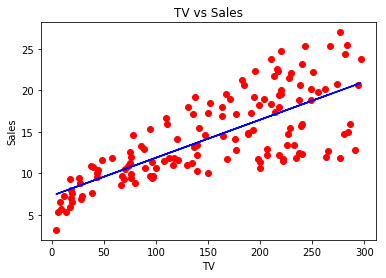

In [85]:
#21 Plot train data and the model

plt.scatter(X_train,Y_train,color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.title("TV vs Sales(Training set)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

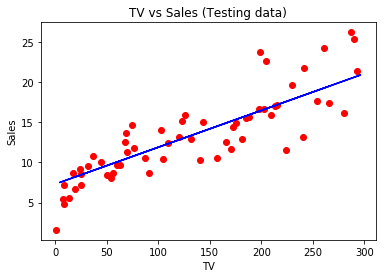

In [98]:
#22 Plot test data and the model
plt.scatter(X_test,Y_test,color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.title("TV vs Sales (Testing data)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [103]:
#23 Print Mean Squared Error and R Squared Value
#from sklearn.metrics import mean_squared_error, r2_score
#mse = mean_squared_error(y_test, y_pred)
#r_squared = r2_score(y_test, y_pred)
#print('Mean_Squared_Error :' ,mse)
#print('r_square_value :',r_squared)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y_test,y_pred)
r_squared=r2_score(Y_test,y_pred)
print("Mean_squared_Error: ",mse)
print("r_square_value: ",r_squared)

Mean_squared_Error:  7.497479593464673
r_square_value:  0.725606346597073


In [29]:
#24 Calculate and print R Squared and Adjusted R Squared values withouth any library

